In [1]:
!pip install pandas matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/tiktok/Live.csv")

# Show first 5 rows
df.head()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


#Number of rows & columns
#Missing values
#Data types of each column
#Basic statistics (mean, min, max)

In [4]:
# Shape of dataset
print("Rows and Columns:", df.shape)

# Data types and missing values
print("\nDataset Info:")
print(df.info())

# Summary statistics
df.describe()


Rows and Columns: (7050, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_reactions       7050 non-null   float64
 1   num_comments        7050 non-null   float64
 2   num_shares          7050 non-null   float64
 3   num_likes           7050 non-null   float64
 4   num_loves           7050 non-null   float64
 5   num_wows            7050 non-null   float64
 6   num_hahas           7050 non-null   float64
 7   num_sads            7050 non-null   float64
 8   num_angrys          7050 non-null   float64
 9   status_type_link    7050 non-null   float64
 10  status_type_photo   7050 non-null   float64
 11  status_type_status  7050 non-null   float64
 12  status_type_video   7050 non-null   float64
dtypes: float64(13)
memory usage: 716.1 KB
None


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,0.048857,0.010689,0.011689,0.045657,0.019374,0.004638,0.004436,0.004778,0.003651,0.008936,0.608227,0.051773,0.331064
std,0.098222,0.042384,0.038435,0.095429,0.060842,0.031366,0.025205,0.031317,0.023446,0.094115,0.488181,0.221584,0.470629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003609,0.000000,0.000000,0.003609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012633,0.000191,0.000000,0.012314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.046497,0.001096,0.001168,0.039225,0.004566,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Missing Values


In [5]:
df.isnull().sum()


,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0
num_sads,0
num_angrys,0
status_type_link,0


In [6]:
# Create a column for Post Type
df['Post_Type'] = df[['status_type_link', 'status_type_photo', 'status_type_status', 'status_type_video']] \
    .idxmax(axis=1) \
    .str.replace('status_type_', '')

# Check first 5 rows to confirm
df[['Post_Type']].head()


,Post_Type
0,video
1,photo
2,video
3,photo
4,photo


In [7]:
# Add a column for total engagement
df['Total_Engagement'] = df[['num_reactions','num_comments','num_shares','num_likes','num_loves',
                             'num_wows','num_hahas','num_sads','num_angrys']].sum(axis=1)

# Check first 5 rows to confirm
df[['Post_Type', 'Total_Engagement']].head()


,Post_Type,Total_Engagement
0,video,0.481744
1,photo,0.063694
2,video,0.161328
3,photo,0.047134
4,photo,0.102234


In [8]:
# Group by Post_Type and calculate mean engagement
engagement_by_type = df.groupby('Post_Type')['Total_Engagement'].mean().sort_values(ascending=False)

# Print results
print("Average Engagement by Post Type:\n", engagement_by_type)


Average Engagement by Post Type:
 Post_Type
video     0.266426
status    0.203766
link      0.159964
photo     0.088102
Name: Total_Engagement, dtype: float64


/tmp/ipython-input-2839792160.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engagement_by_type.index, y=engagement_by_type.values, palette="viridis")


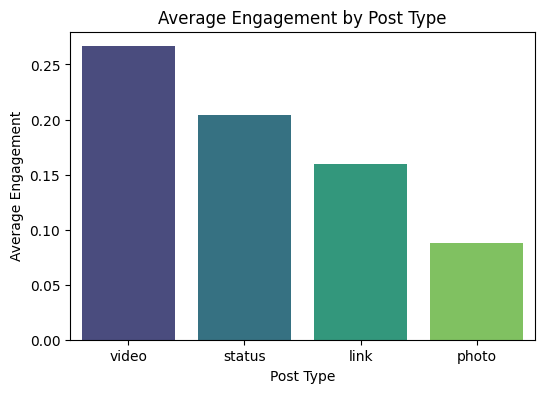

In [9]:
# Bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x=engagement_by_type.index, y=engagement_by_type.values, palette="viridis")
plt.title("Average Engagement by Post Type")
plt.xlabel("Post Type")
plt.ylabel("Average Engagement")
plt.show()


Total Reactions Count:
 num_reactions    344.442887
num_likes        321.879830
num_loves        136.585997
num_shares        82.406250
num_comments      75.355407
num_sads          33.686275
num_wows          32.697842
num_hahas         31.273885
num_angrys        25.741935
dtype: float64


/tmp/ipython-input-3752824490.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reaction_sums.index, y=reaction_sums.values, palette="mako")


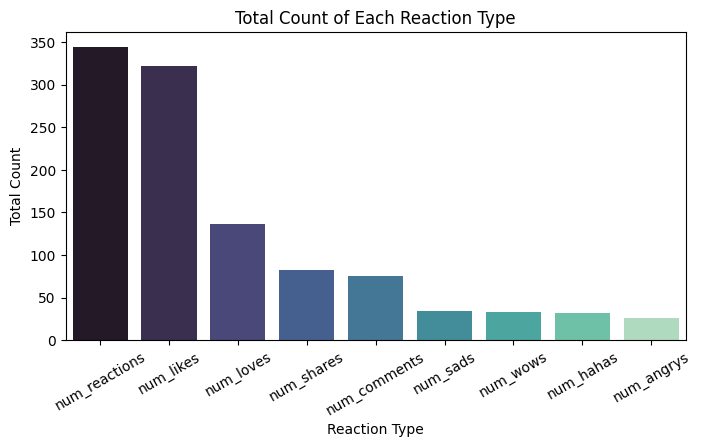

In [10]:
# Sum all reaction columns
reaction_sums = df[['num_reactions','num_comments','num_shares','num_likes','num_loves',
                    'num_wows','num_hahas','num_sads','num_angrys']].sum().sort_values(ascending=False)

# Print results
print("Total Reactions Count:\n", reaction_sums)

# Bar chart for reactions
plt.figure(figsize=(8,4))
sns.barplot(x=reaction_sums.index, y=reaction_sums.values, palette="mako")
plt.title("Total Count of Each Reaction Type")
plt.xlabel("Reaction Type")
plt.ylabel("Total Count")
plt.xticks(rotation=30)
plt.show()


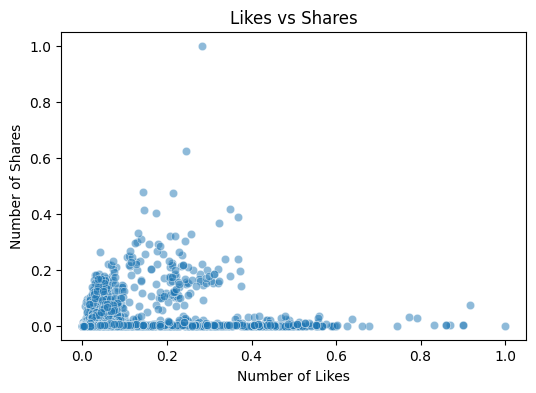

Correlation between Likes and Shares: 0.17249192961479928


In [11]:
# Scatter plot to see relationship
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['num_likes'], y=df['num_shares'], alpha=0.5)
plt.title("Likes vs Shares")
plt.xlabel("Number of Likes")
plt.ylabel("Number of Shares")
plt.show()

# Correlation value
correlation = df['num_likes'].corr(df['num_shares'])
print("Correlation between Likes and Shares:", correlation)


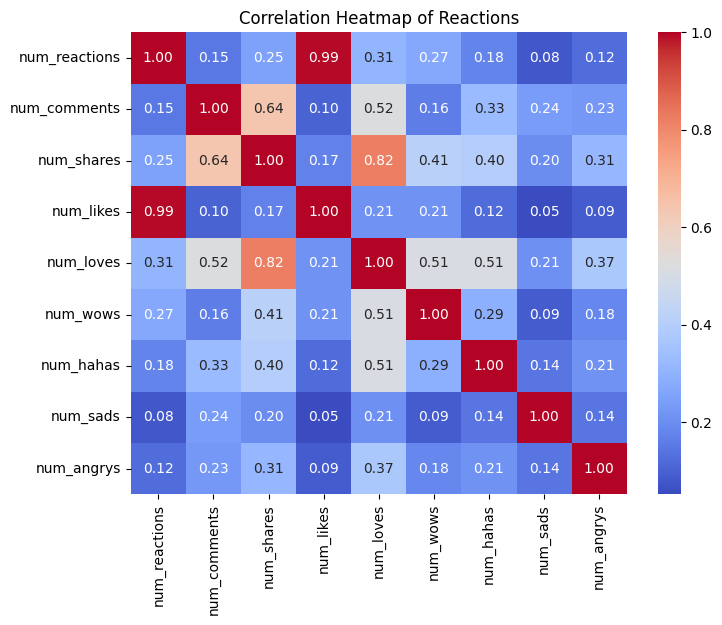

In [12]:
# Select only reaction columns
reaction_cols = ['num_reactions','num_comments','num_shares','num_likes','num_loves',
                 'num_wows','num_hahas','num_sads','num_angrys']

# Calculate correlation matrix
corr_matrix = df[reaction_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Reactions")
plt.show()


In [13]:
# Engagement Score = weighted sum of reactions
# We give more weight to comments & shares because they mean deeper engagement
df['Engagement_Score'] = (
    df['num_likes']*1 +
    df['num_comments']*2 +
    df['num_shares']*3 +
    df['num_loves']*1.5 +
    df['num_wows']*1 +
    df['num_hahas']*1 +
    df['num_sads']*1 +
    df['num_angrys']*1
)

# Check first 5 rows
df[['Post_Type', 'Engagement_Score']].head()


,Post_Type,Engagement_Score
0,video,0.616875
1,photo,0.031847
2,video,0.173652
3,photo,0.023567
4,photo,0.063860


Average Engagement Score by Post Type:
 Post_Type
video     0.331480
status    0.115015
link      0.084447
photo     0.052965
Name: Engagement_Score, dtype: float64


/tmp/ipython-input-1381196904.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_by_type.index, y=score_by_type.values, palette="plasma")


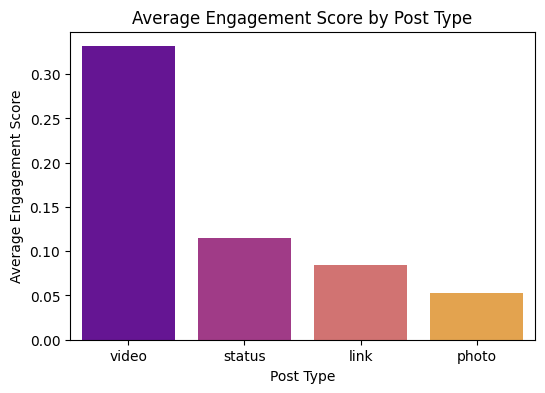

In [14]:
# Average Engagement Score per post type
score_by_type = df.groupby('Post_Type')['Engagement_Score'].mean().sort_values(ascending=False)

# Print results
print("Average Engagement Score by Post Type:\n", score_by_type)

# Bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=score_by_type.index, y=score_by_type.values, palette="plasma")
plt.title("Average Engagement Score by Post Type")
plt.xlabel("Post Type")
plt.ylabel("Average Engagement Score")
plt.show()
